In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt   

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')    

In [ ]:
describe=pd.read_excel('/content/drive/MyDrive/개인프로젝트/연습/신용카드 사용자 연체 예측 AI 경진대회_data(데이콘)/open/변수설명.xlsx')

In [ ]:
describe

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,index
2,NaN,NaN,gender: 성별
3,NaN,NaN,car: 차량 소유 여부
4,NaN,NaN,reality: 부동산 소유 여부
5,NaN,NaN,child_num: 자녀 수
6,NaN,NaN,income_total: 연간 소득
7,NaN,NaN,income_type: 소득 분류
8,NaN,NaN,"['Commercial associate', 'Working', 'State ser..."
9,NaN,NaN,edu_type: 교육 수준


In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/개인프로젝트/연습/신용카드 사용자 연체 예측 AI 경진대회_data(데이콘)/open/train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/개인프로젝트/연습/신용카드 사용자 연체 예측 AI 경진대회_data(데이콘)/open/test.csv')

In [ ]:
train_data=train_data.copy()
test_data1=test_data.copy()

In [ ]:
train_data['income_total']=train_data['income_total']/100

# Separating Feature

In [ ]:
#categorical_feature and numerical_feature
numerical_features=train_data.dtypes[train_data.dtypes != "object"].index.tolist()
categorical_features=train_data.dtypes[train_data.dtypes =='object'].index.tolist()

In [ ]:
train_data.shape

(26457, 20)

In [ ]:
train_data.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1873.065245,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1018.783680,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,270.000000,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1215.000000,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1575.000000,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2250.000000,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,15750.000000,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [ ]:
train_data.duplicated().sum()

0

In [ ]:
pd.isna(train_data).sum()


index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

# Data Distribution

## corr

<AxesSubplot:>

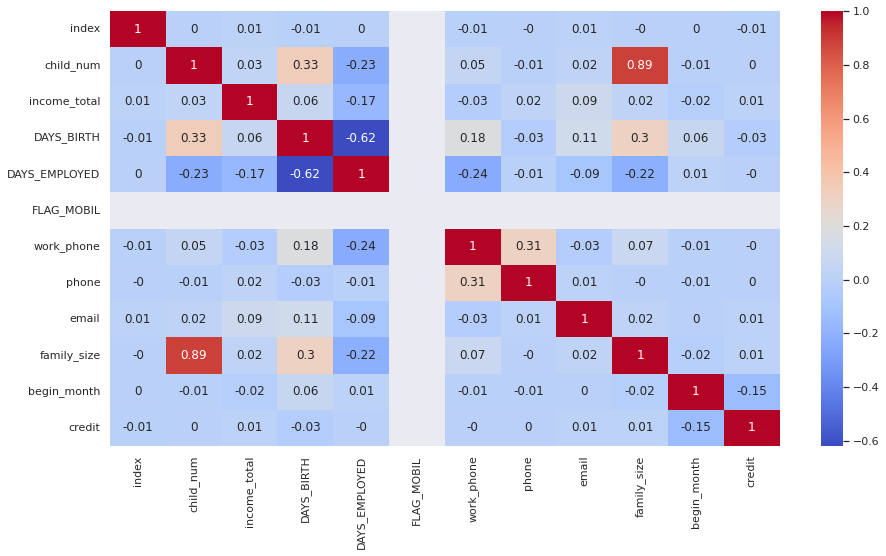

In [ ]:
corr=np.round(train_data.corr(),2)
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr, annot=True, cmap='coolwarm')

## categorical_features

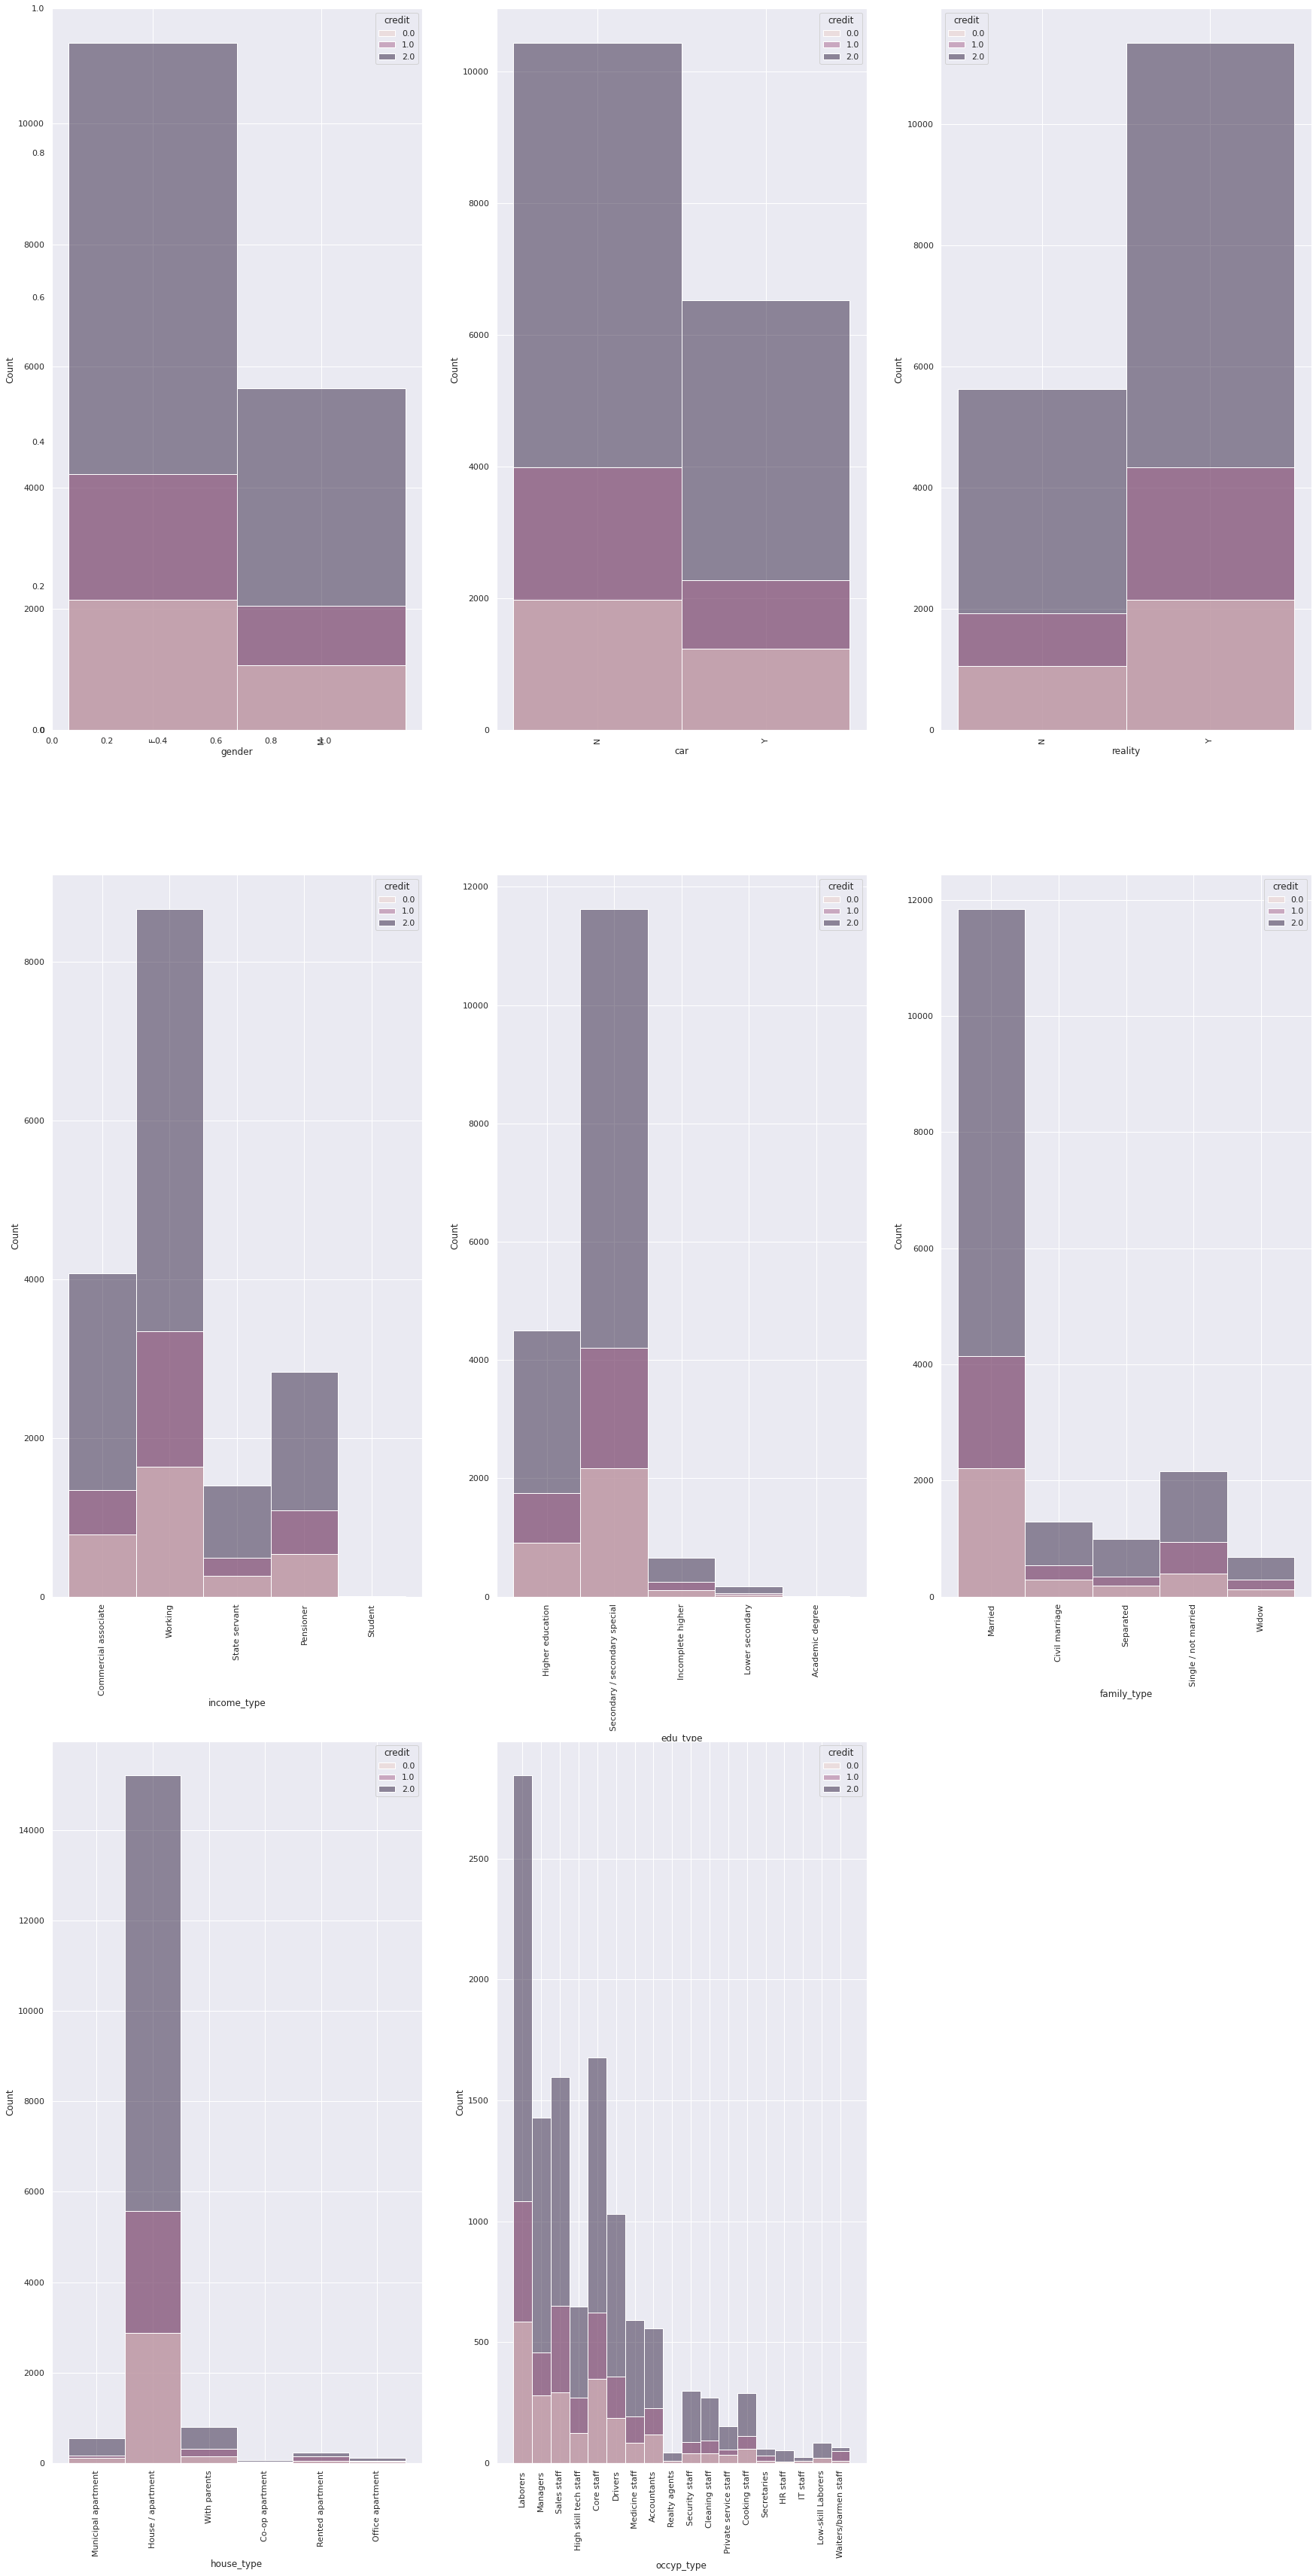

In [ ]:
fig=plt.figure(figsize=(30,60))
ax1=fig.add_subplot(3,4,1)

for i in range(1,len(categorical_features)+1):
  sns.histplot(x=train_data[categorical_features[i-1]], ax=fig.add_subplot(3,3,i), hue=train_data['credit'])
  plt.xticks(rotation=90)
plt.show()

## numerical_features

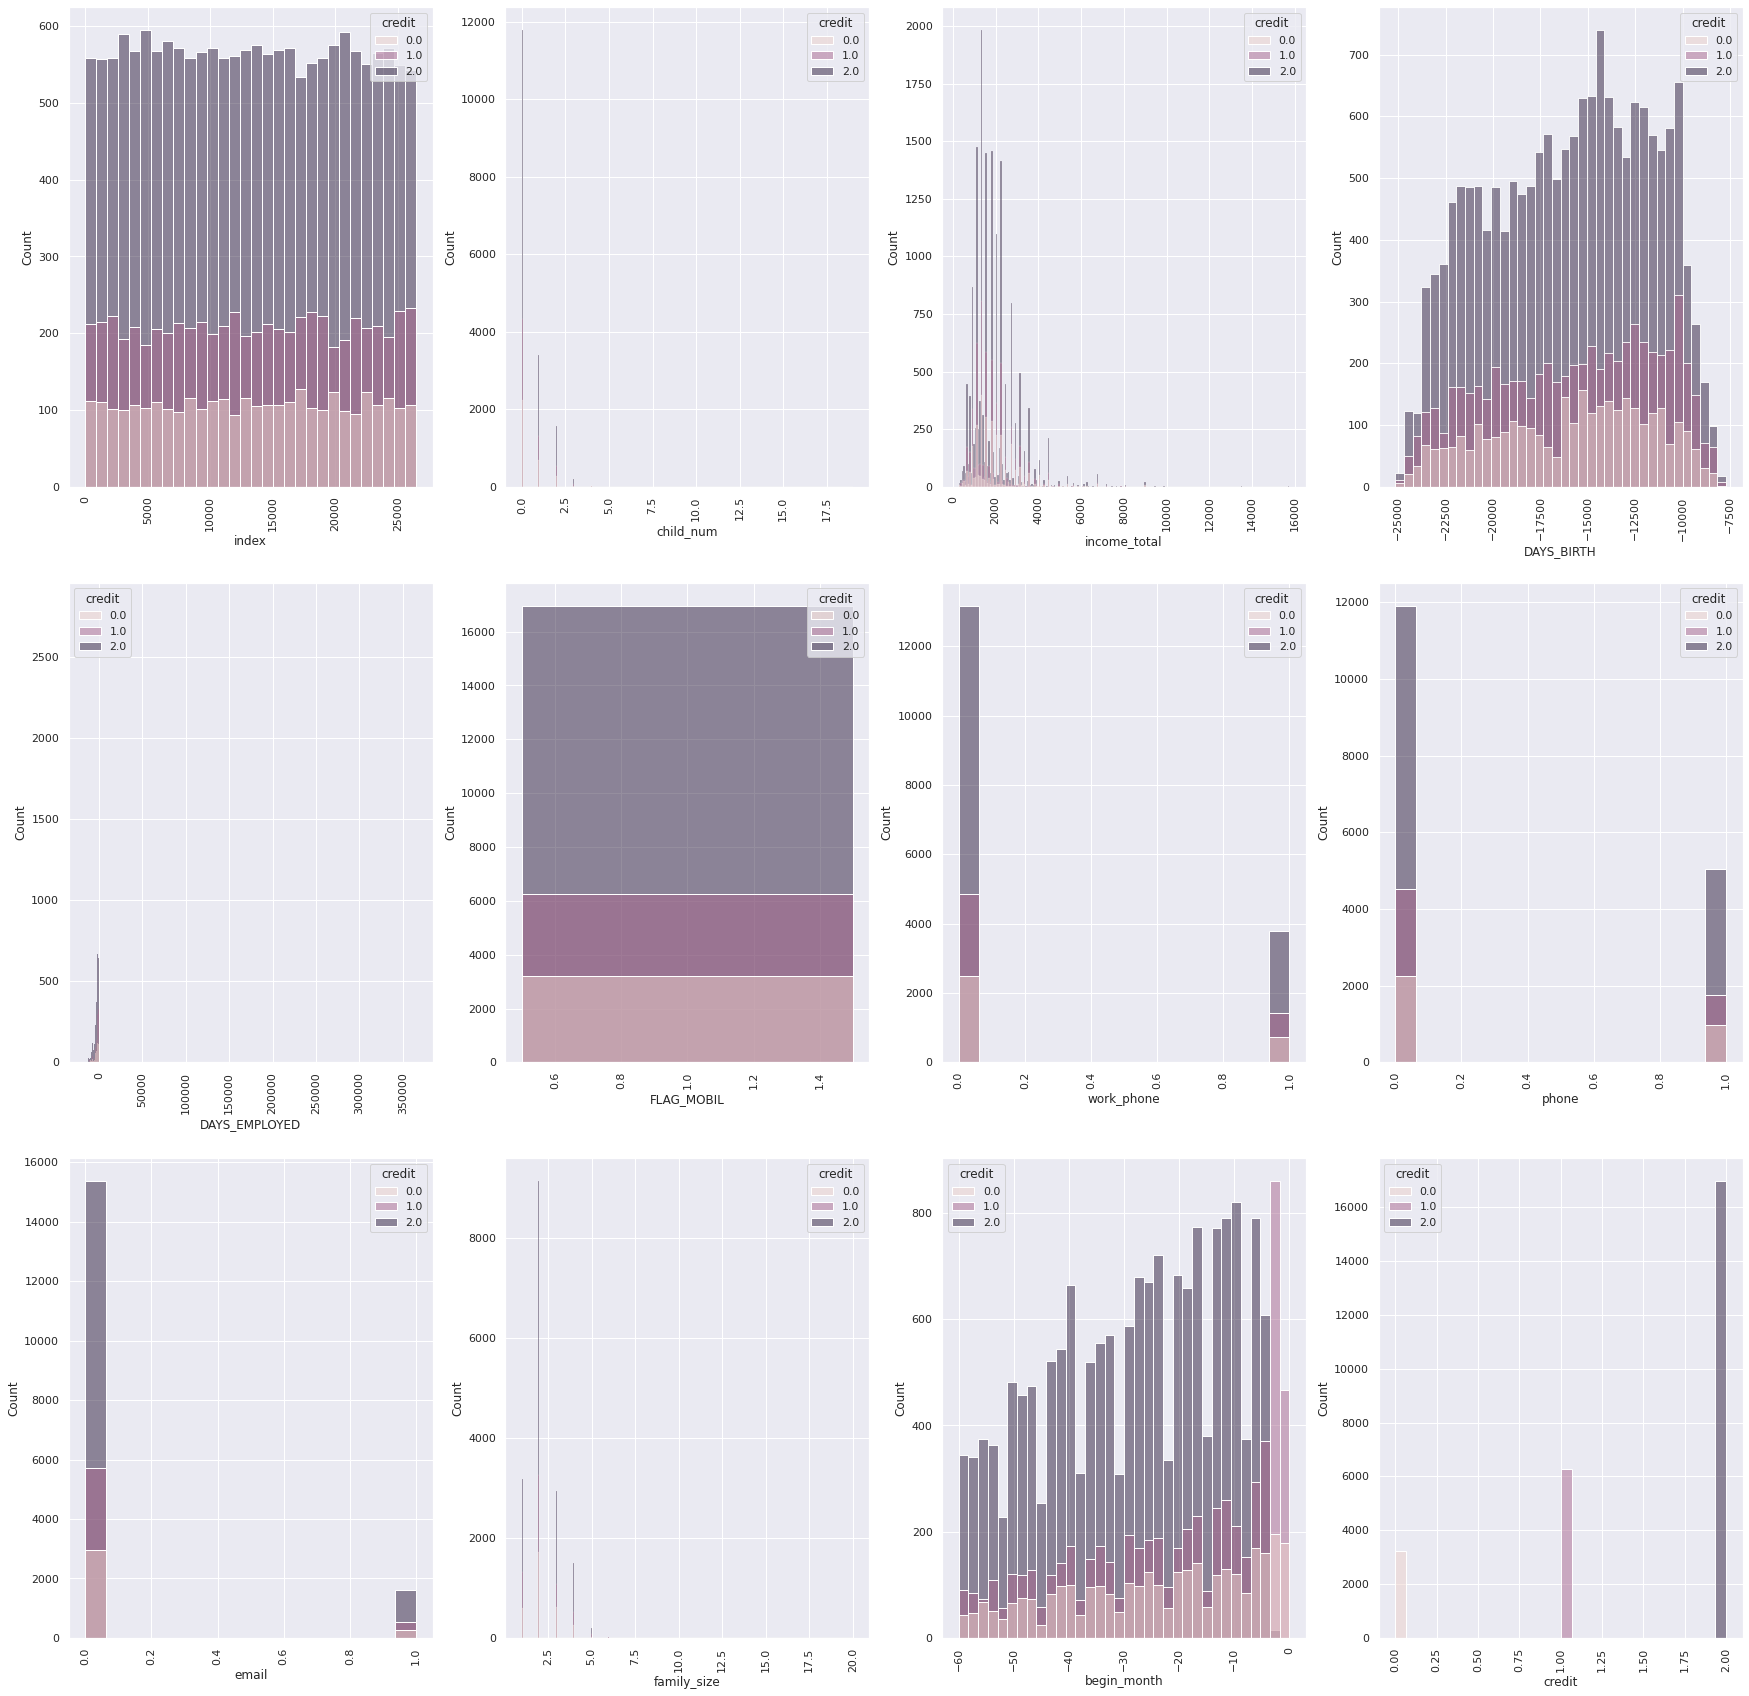

In [ ]:
fig=plt.figure(figsize=(30,30))

for i in range(1,len(numerical_features)+1):
  sns.histplot(x=train_data[numerical_features[i-1]], ax=fig.add_subplot(3,4,i), hue=train_data['credit'])
  plt.xticks(rotation=90)
plt.show()

# EDA

In [ ]:
list(train_data)

['index',
 'gender',
 'car',
 'reality',
 'child_num',
 'income_total',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'work_phone',
 'phone',
 'email',
 'occyp_type',
 'family_size',
 'begin_month',
 'credit']

## 1. gender
### need a label encoder

## 2. car

### need a label encoder

## 3. reality

###need a label encoder

## 4. child_num
### need to remove an outlier

In [ ]:
train_data['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [ ]:
train_data['child_num']=np.where(train_data['child_num']>=7,7,train_data['child_num'])

In [ ]:
# child_num_count=child_num.groupby(['child_num','credit'],as_index=False).agg(count=('credit','count'))

In [ ]:
# for i in range(0,19,3):
#   a=child_num_count.iloc[i:i+3]
#   a['percent(%)']=np.round(a['count']/sum(a['count'])*100,2)
#   print(a)
#   print('*'*80)
#   print()

<AxesSubplot:xlabel='child_num', ylabel='Count'>

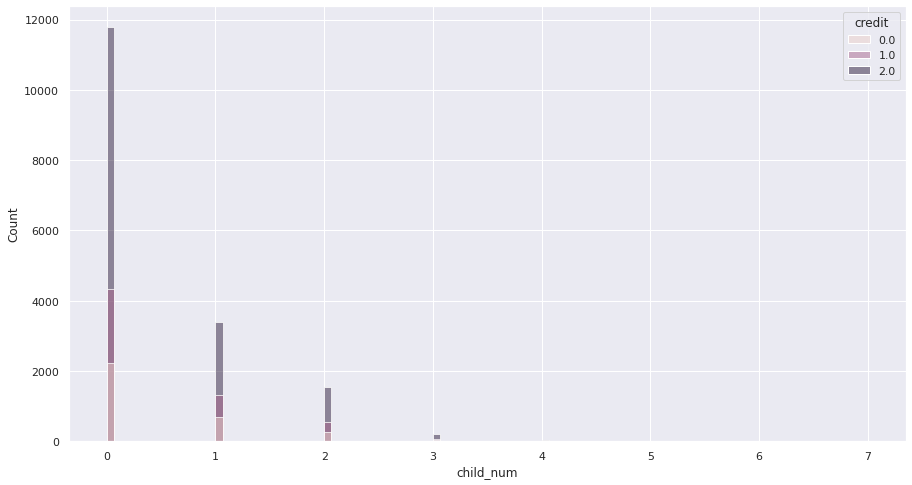

In [ ]:
#ax1
sns.histplot(x=train_data['child_num'], data=train_data, hue='credit')

# 5. income_total
### need to normalization

<AxesSubplot:xlabel='income_total', ylabel='Count'>

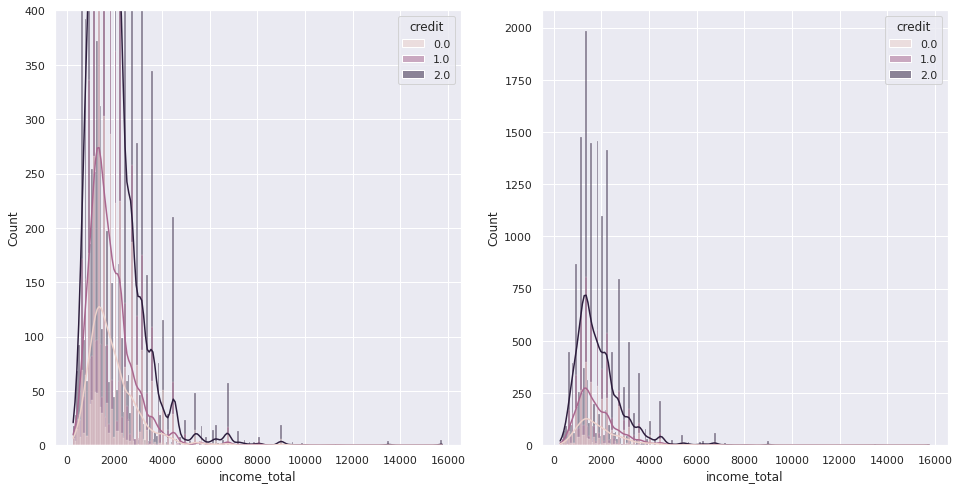

In [ ]:
fig=plt.figure(figsize=(16,8))
ax1=fig.add_subplot(1,2,2)
ax2=fig.add_subplot(1,2,1)
sns.histplot(x=train_data['income_total'],hue=train_data['credit'],ax=ax2, kde=True)
ax2.set_ylim([0,400])

sns.histplot(x=train_data['income_total'],hue=train_data['credit'],ax=ax1, kde=True)

<AxesSubplot:xlabel='income_total', ylabel='Count'>

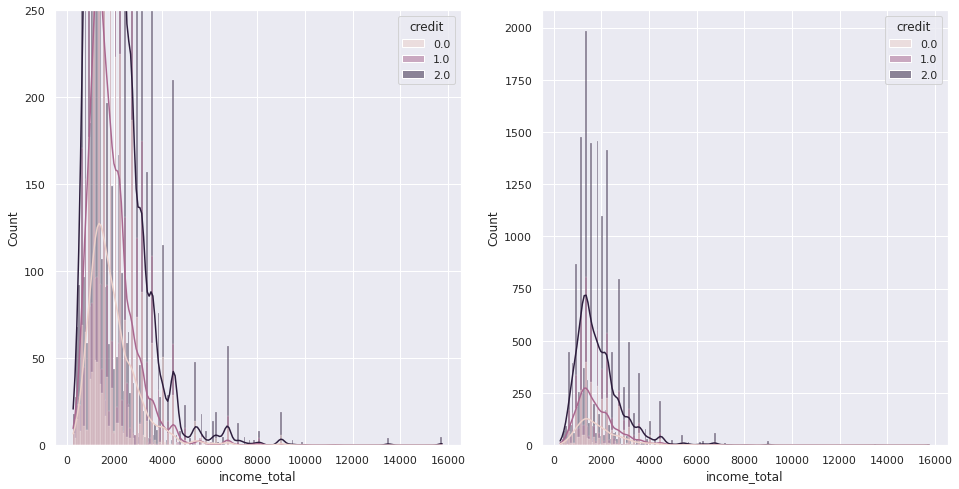

In [ ]:
fig=plt.figure(figsize=(16,8))
ax1=fig.add_subplot(1,2,2)
ax2=fig.add_subplot(1,2,1)
sns.histplot(x=train_data['income_total'], hue=train_data['credit'],ax=ax2, kde=True)
ax2.set_ylim([0,250])

sns.histplot(x=train_data['income_total'], hue=train_data['credit'],ax=ax1, kde=True)

# 6. edu_type
### need a label encoder

In [ ]:
edu_type=train_data.groupby(['edu_type','credit'], as_index=False).agg(count=('credit','count'))

for i in range(0,15,3):
  a=edu_type.iloc[i:i+3]
  a['percent(%)']=np.round((a['count']/sum(a['count'])*100),2)
  print(a)
  print('*'*43)
  print()

          edu_type  credit  count  percent(%)
0  Academic degree     0.0      2        8.70
1  Academic degree     1.0      7       30.43
2  Academic degree     2.0     14       60.87
*******************************************

           edu_type  credit  count  percent(%)
3  Higher education     0.0    909       12.69
4  Higher education     1.0   1751       24.45
5  Higher education     2.0   4502       62.86
*******************************************

            edu_type  credit  count  percent(%)
6  Incomplete higher     0.0    114       11.18
7  Incomplete higher     1.0    246       24.12
8  Incomplete higher     2.0    660       64.71
*******************************************

           edu_type  credit  count  percent(%)
9   Lower secondary     0.0     28       10.89
10  Lower secondary     1.0     59       22.96
11  Lower secondary     2.0    170       66.15
*******************************************

                         edu_type  credit  count  percent(%)
12  Sec

# 7. family_type
### need a label encoder

In [ ]:
train_data['family_type'].value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

In [ ]:
family_type=train_data.groupby(['family_type','credit'],as_index=False).agg(count=('credit','count'))
for i in range(0,15,3):
  a=family_type.iloc[i:i+3]
  a['percent(%)']=np.round((a['count']/sum(a['count']))*100,2)
  print(a)
  print('*'*43)
  print()

      family_type  credit  count  percent(%)
0  Civil marriage     0.0    288       13.57
1  Civil marriage     1.0    539       25.39
2  Civil marriage     2.0   1296       61.05
*******************************************

  family_type  credit  count  percent(%)
3     Married     0.0   2213       12.16
4     Married     1.0   4140       22.75
5     Married     2.0  11843       65.09
*******************************************

  family_type  credit  count  percent(%)
6   Separated     0.0    193       12.54
7   Separated     1.0    349       22.68
8   Separated     2.0    997       64.78
*******************************************

             family_type  credit  count  percent(%)
9   Single / not married     0.0    402       11.50
10  Single / not married     1.0    940       26.89
11  Single / not married     2.0   2154       61.61
*******************************************

   family_type  credit  count  percent(%)
12       Widow     0.0    126       11.42
13       Widow     1

# 8. house_type
### need a label encoder

In [ ]:
train_data['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

In [ ]:
house_type=train_data.groupby(['house_type','credit'],as_index=False).agg(count=('credit','count'))
for i in range(0,18,3):
  a=house_type.iloc[i:i+3]
  a['percent(%)']=np.round((a['count']/sum(a['count']))*100,2)
  print(a)
  print('*'*43)
  print()

        house_type  credit  count  percent(%)
0  Co-op apartment     0.0     14       12.73
1  Co-op apartment     1.0     30       27.27
2  Co-op apartment     2.0     66       60.00
*******************************************

          house_type  credit  count  percent(%)
3  House / apartment     0.0   2873       12.15
4  House / apartment     1.0   5569       23.54
5  House / apartment     2.0  15211       64.31
*******************************************

            house_type  credit  count  percent(%)
6  Municipal apartment     0.0    110       13.45
7  Municipal apartment     1.0    160       19.56
8  Municipal apartment     2.0    548       66.99
*******************************************

          house_type  credit  count  percent(%)
9   Office apartment     0.0     24       12.63
10  Office apartment     1.0     48       25.26
11  Office apartment     2.0    118       62.11
*******************************************

          house_type  credit  count  percent(%)
12  

# 9. DAYS_BIRTH
### need to preprocess a year, a month, a week for new features
### need to change from '-' to '+'
### need to make a new feature with income_total

In [ ]:
train_data['DAYS_BIRTH']=train_data['DAYS_BIRTH']*-1

In [ ]:
train_data['DAYS_BIRTH'].describe()

count    26457.000000
mean     15958.053899
std       4201.589022
min       7705.000000
25%      12446.000000
50%      15547.000000
75%      19431.000000
max      25152.000000
Name: DAYS_BIRTH, dtype: float64

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='Count'>

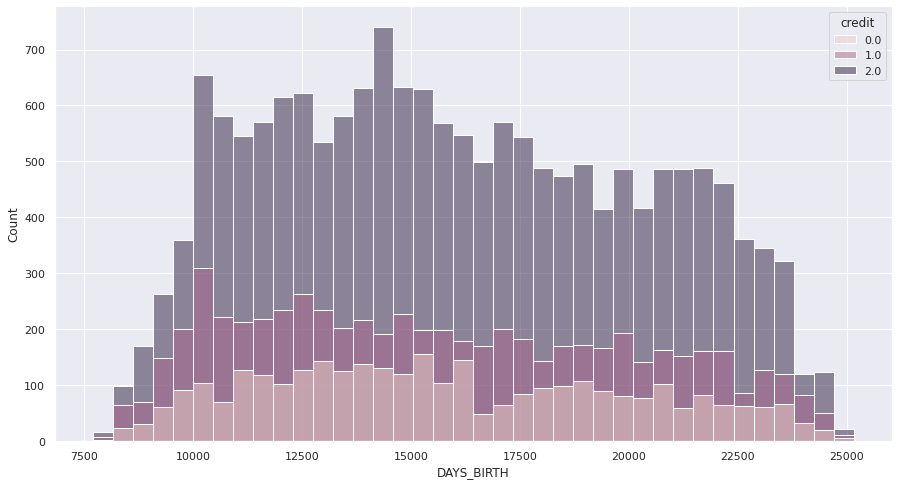

In [ ]:
sns.histplot(x=train_data['DAYS_BIRTH'], data=train_data, hue='credit')

# 10.work_phone
### dont need to preprocessing

In [ ]:
train_data['work_phone'].value_counts()

0    20511
1     5946
Name: work_phone, dtype: int64

In [ ]:
work_phone=train_data.groupby(['work_phone','credit'],as_index=False).agg(count=('credit','count'))
for i in range(0,6,3):
  a=work_phone.iloc[i:i+3]
  a['percent(%)']=np.round(a['count']/sum(a['count'])*100,2)
  print(a)
  print('*'*43)
  print()

   work_phone  credit  count  percent(%)
0           0     0.0   2493       12.15
1           0     1.0   4844       23.62
2           0     2.0  13174       64.23
*******************************************

   work_phone  credit  count  percent(%)
3           1     0.0    729       12.26
4           1     1.0   1423       23.93
5           1     2.0   3794       63.81
*******************************************



# 11. phone
### dont need to preprocessing

In [ ]:
train_data['phone'].value_counts()

0    18672
1     7785
Name: phone, dtype: int64

In [ ]:
phone=train_data.groupby(['phone','credit'],as_index=False).agg(count=('credit','count'))
for i in range(0,6,3):
  a=phone.iloc[i:i+3]
  a['percent(%)']=np.round(a['count']/sum(a['count'])*100,2)
  print(a)
  print('*'*43)
  print()

   phone  credit  count  percent(%)
0      0     0.0   2245       12.02
1      0     1.0   4510       24.15
2      0     2.0  11917       63.82
*******************************************

   phone  credit  count  percent(%)
3      1     0.0    977       12.55
4      1     1.0   1757       22.57
5      1     2.0   5051       64.88
*******************************************



# 12. email

In [ ]:
train_data['email'].value_counts()

0    24042
1     2415
Name: email, dtype: int64

In [ ]:
email=train_data.groupby(['email','credit'],as_index=False).agg(count=('credit','count'))
for i in range(0,6,3):
  a=email.iloc[i:i+3]
  a['percent(%)']=np.round(a['count']/sum(a['count'])*100,2)
  print(a)
  print('*'*43)
  print()

   email  credit  count  percent(%)
0      0     0.0   2953       12.28
1      0     1.0   5724       23.81
2      0     2.0  15365       63.91
*******************************************

   email  credit  count  percent(%)
3      1     0.0    269       11.14
4      1     1.0    543       22.48
5      1     2.0   1603       66.38
*******************************************



#13. occyp_type
need to deal with a missing value

In [ ]:
train_data['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [ ]:
pd.isna(train_data['occyp_type']).sum()

8171

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Managers'),
  Text(2, 0, 'Sales staff'),
  Text(3, 0, 'High skill tech staff'),
  Text(4, 0, 'Core staff'),
  Text(5, 0, 'Drivers'),
  Text(6, 0, 'Medicine staff'),
  Text(7, 0, 'Accountants'),
  Text(8, 0, 'Realty agents'),
  Text(9, 0, 'Security staff'),
  Text(10, 0, 'Cleaning staff'),
  Text(11, 0, 'Private service staff'),
  Text(12, 0, 'Cooking staff'),
  Text(13, 0, 'Secretaries'),
  Text(14, 0, 'HR staff'),
  Text(15, 0, 'IT staff'),
  Text(16, 0, 'Low-skill Laborers'),
  Text(17, 0, 'Waiters/barmen staff')])

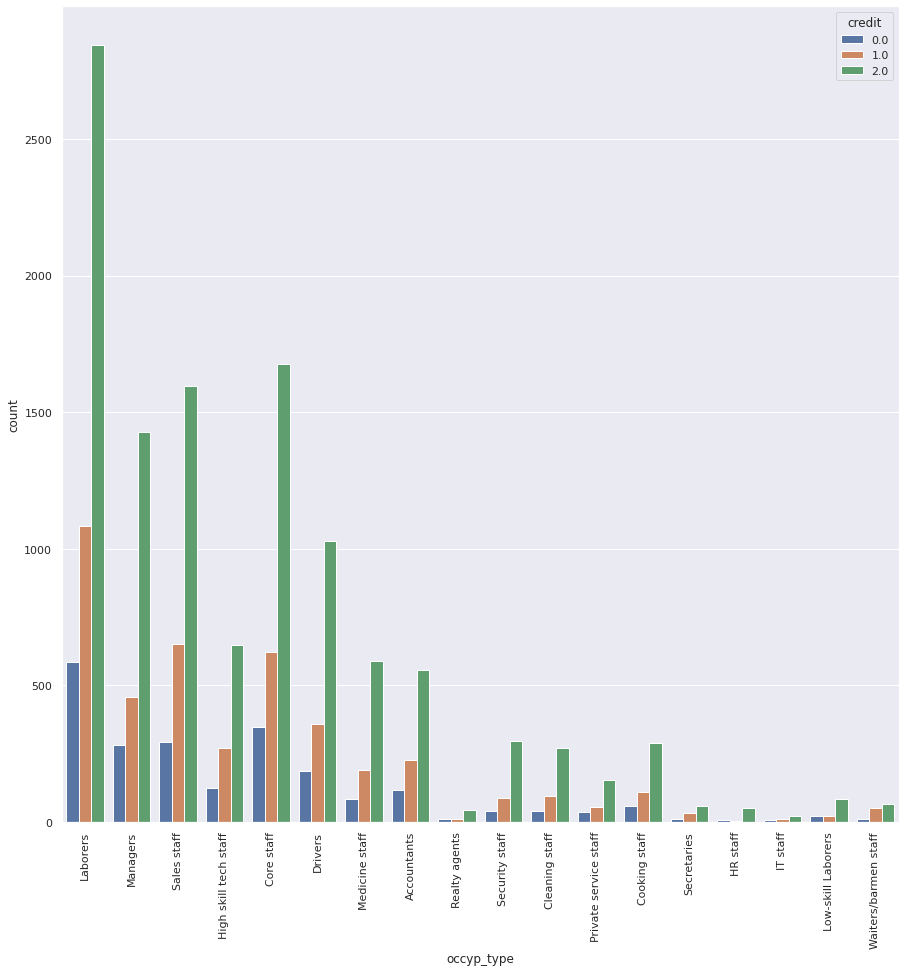

In [ ]:
fig=plt.figure(figsize=(15,15))

sns.countplot(x=train_data['occyp_type'], data=train_data, hue='credit')
plt.xticks(rotation=90)

# 14. begin_month

### need to preprocess a year, a month, a week for new features
### need to change from '-' to '+'
### need to make a new feature with income_total

In [ ]:
train_data['begin_month']=train_data['begin_month']*-1


In [ ]:
train_data['begin_month']=train_data['begin_month']+1

<AxesSubplot:xlabel='begin_month', ylabel='Count'>

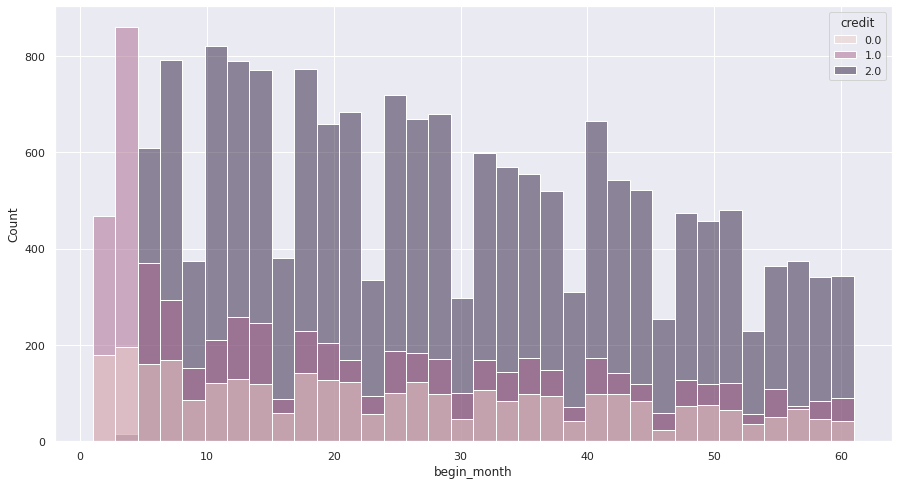

In [ ]:
sns.histplot(x=train_data['begin_month'], data=train_data, hue='credit')

In [ ]:
train_data['begin_month'].describe()

count    26457.000000
mean        27.123294
std         16.559550
min          1.000000
25%         13.000000
50%         25.000000
75%         40.000000
max         61.000000
Name: begin_month, dtype: float64

<AxesSubplot:xlabel='begin_month', ylabel='Count'>

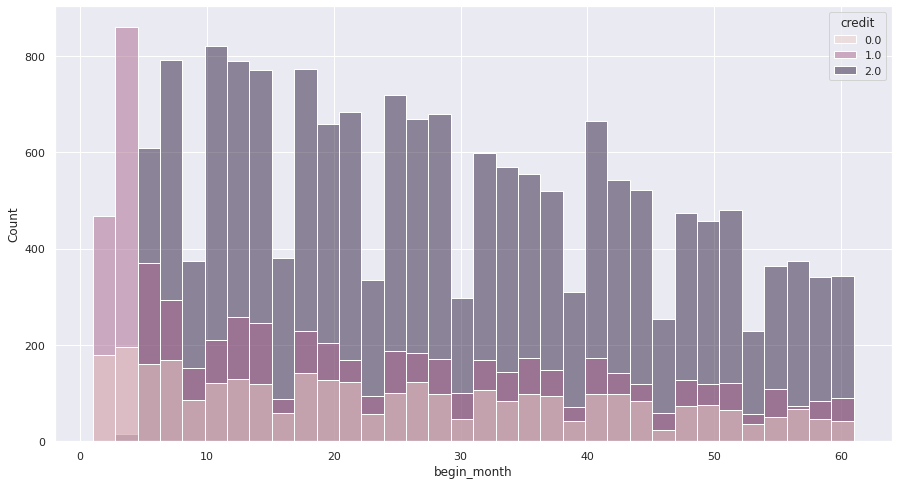

In [ ]:
sns.histplot(x=train_data['begin_month'], data=train_data, hue='credit')

# 15. income_type

In [ ]:
train_data['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [ ]:
income_type=train_data.groupby(['income_type','credit'],as_index=False).agg(counts=('credit','count'))
for i in range(0,14):
  a=income_type.iloc[i:i+3]
  a['percent(%)']=np.round(a['counts']/sum(a['counts']),2)
  print(a)
  print('*'*43)
  print()

            income_type  credit  counts  percent(%)
0  Commercial associate     0.0     782        0.13
1  Commercial associate     1.0    1344        0.22
2  Commercial associate     2.0    4076        0.66
*******************************************

            income_type  credit  counts  percent(%)
1  Commercial associate     1.0    1344        0.23
2  Commercial associate     2.0    4076        0.68
3             Pensioner     0.0     536        0.09
*******************************************

            income_type  credit  counts  percent(%)
2  Commercial associate     2.0    4076        0.72
3             Pensioner     0.0     536        0.09
4             Pensioner     1.0    1084        0.19
*******************************************

  income_type  credit  counts  percent(%)
3   Pensioner     0.0     536        0.12
4   Pensioner     1.0    1084        0.24
5   Pensioner     2.0    2829        0.64
*******************************************

     income_type  credit  co

# 16.family_size

In [ ]:
train_data['family_size'].value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

<AxesSubplot:xlabel='family_size', ylabel='Count'>

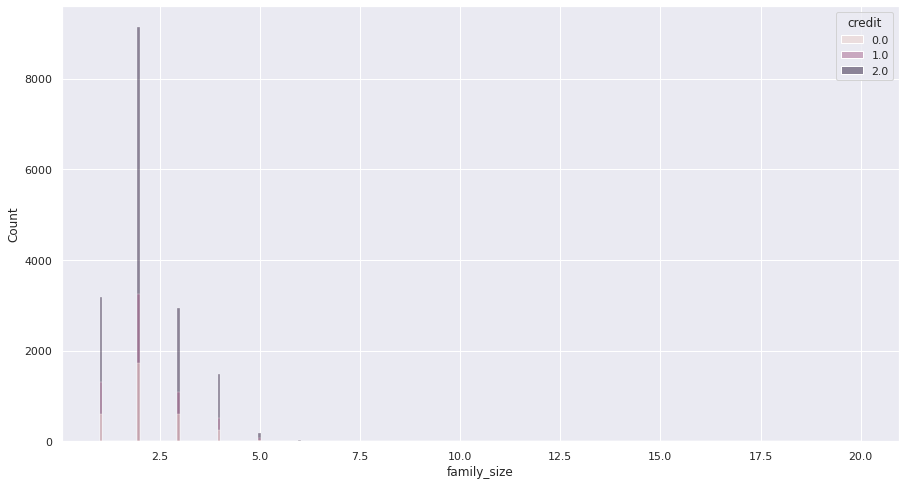

In [ ]:
sns.histplot(x=train_data['family_size'], data=train_data, hue='credit')

# 17. DAYS_EMPLOYED

In [ ]:
train_data['DAYS_EMPLOYED']=train_data['DAYS_EMPLOYED']*-1

In [ ]:
train_data['DAYS_EMPLOYED']=np.where(train_data['DAYS_EMPLOYED']<=0,0,train_data['DAYS_EMPLOYED'])
train_data['DAYS_EMPLOYED']=np.where(train_data['DAYS_EMPLOYED']==0,1,train_data['DAYS_EMPLOYED'])

In [ ]:
train_data['DAYS_EMPLOYED'].describe()

count    26457.000000
mean      2198.697282
std       2369.984950
min          1.000000
25%        407.000000
50%       1539.000000
75%       3153.000000
max      15713.000000
Name: DAYS_EMPLOYED, dtype: float64

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Count'>

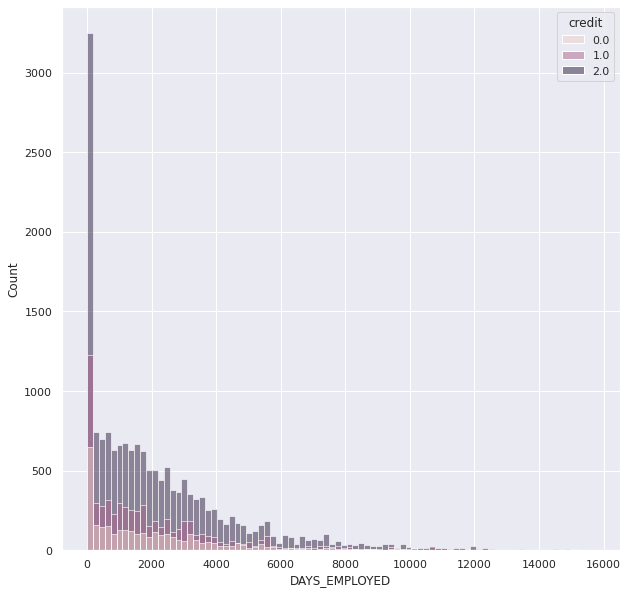

In [ ]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(1,1,1)
sns.histplot(x=train_data['DAYS_EMPLOYED'], data=train_data, hue='credit',ax=ax1)